In [54]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from scipy.signal import savgol_filter

import random

# can be installed using 
# pip install metapredict
# for docs see https://metapredict.readthedocs.io/
import metapredict as meta


In [55]:
import metapredict as meta
import protfasta

with open('data/UP000002485_284812_SCHPO_beta_scores.txt','r') as fh:
    content = fh.readlines()
    

In [47]:
R2 = []
L = []
count=0
data ={}
for i in content:
    line = i.strip()

    uid = line.split()[0].split('-')[1]
    seq = line.split()[1]
    scores = [float(x) for x in line.split()[2:]]
    data[uid] = [seq, scores]


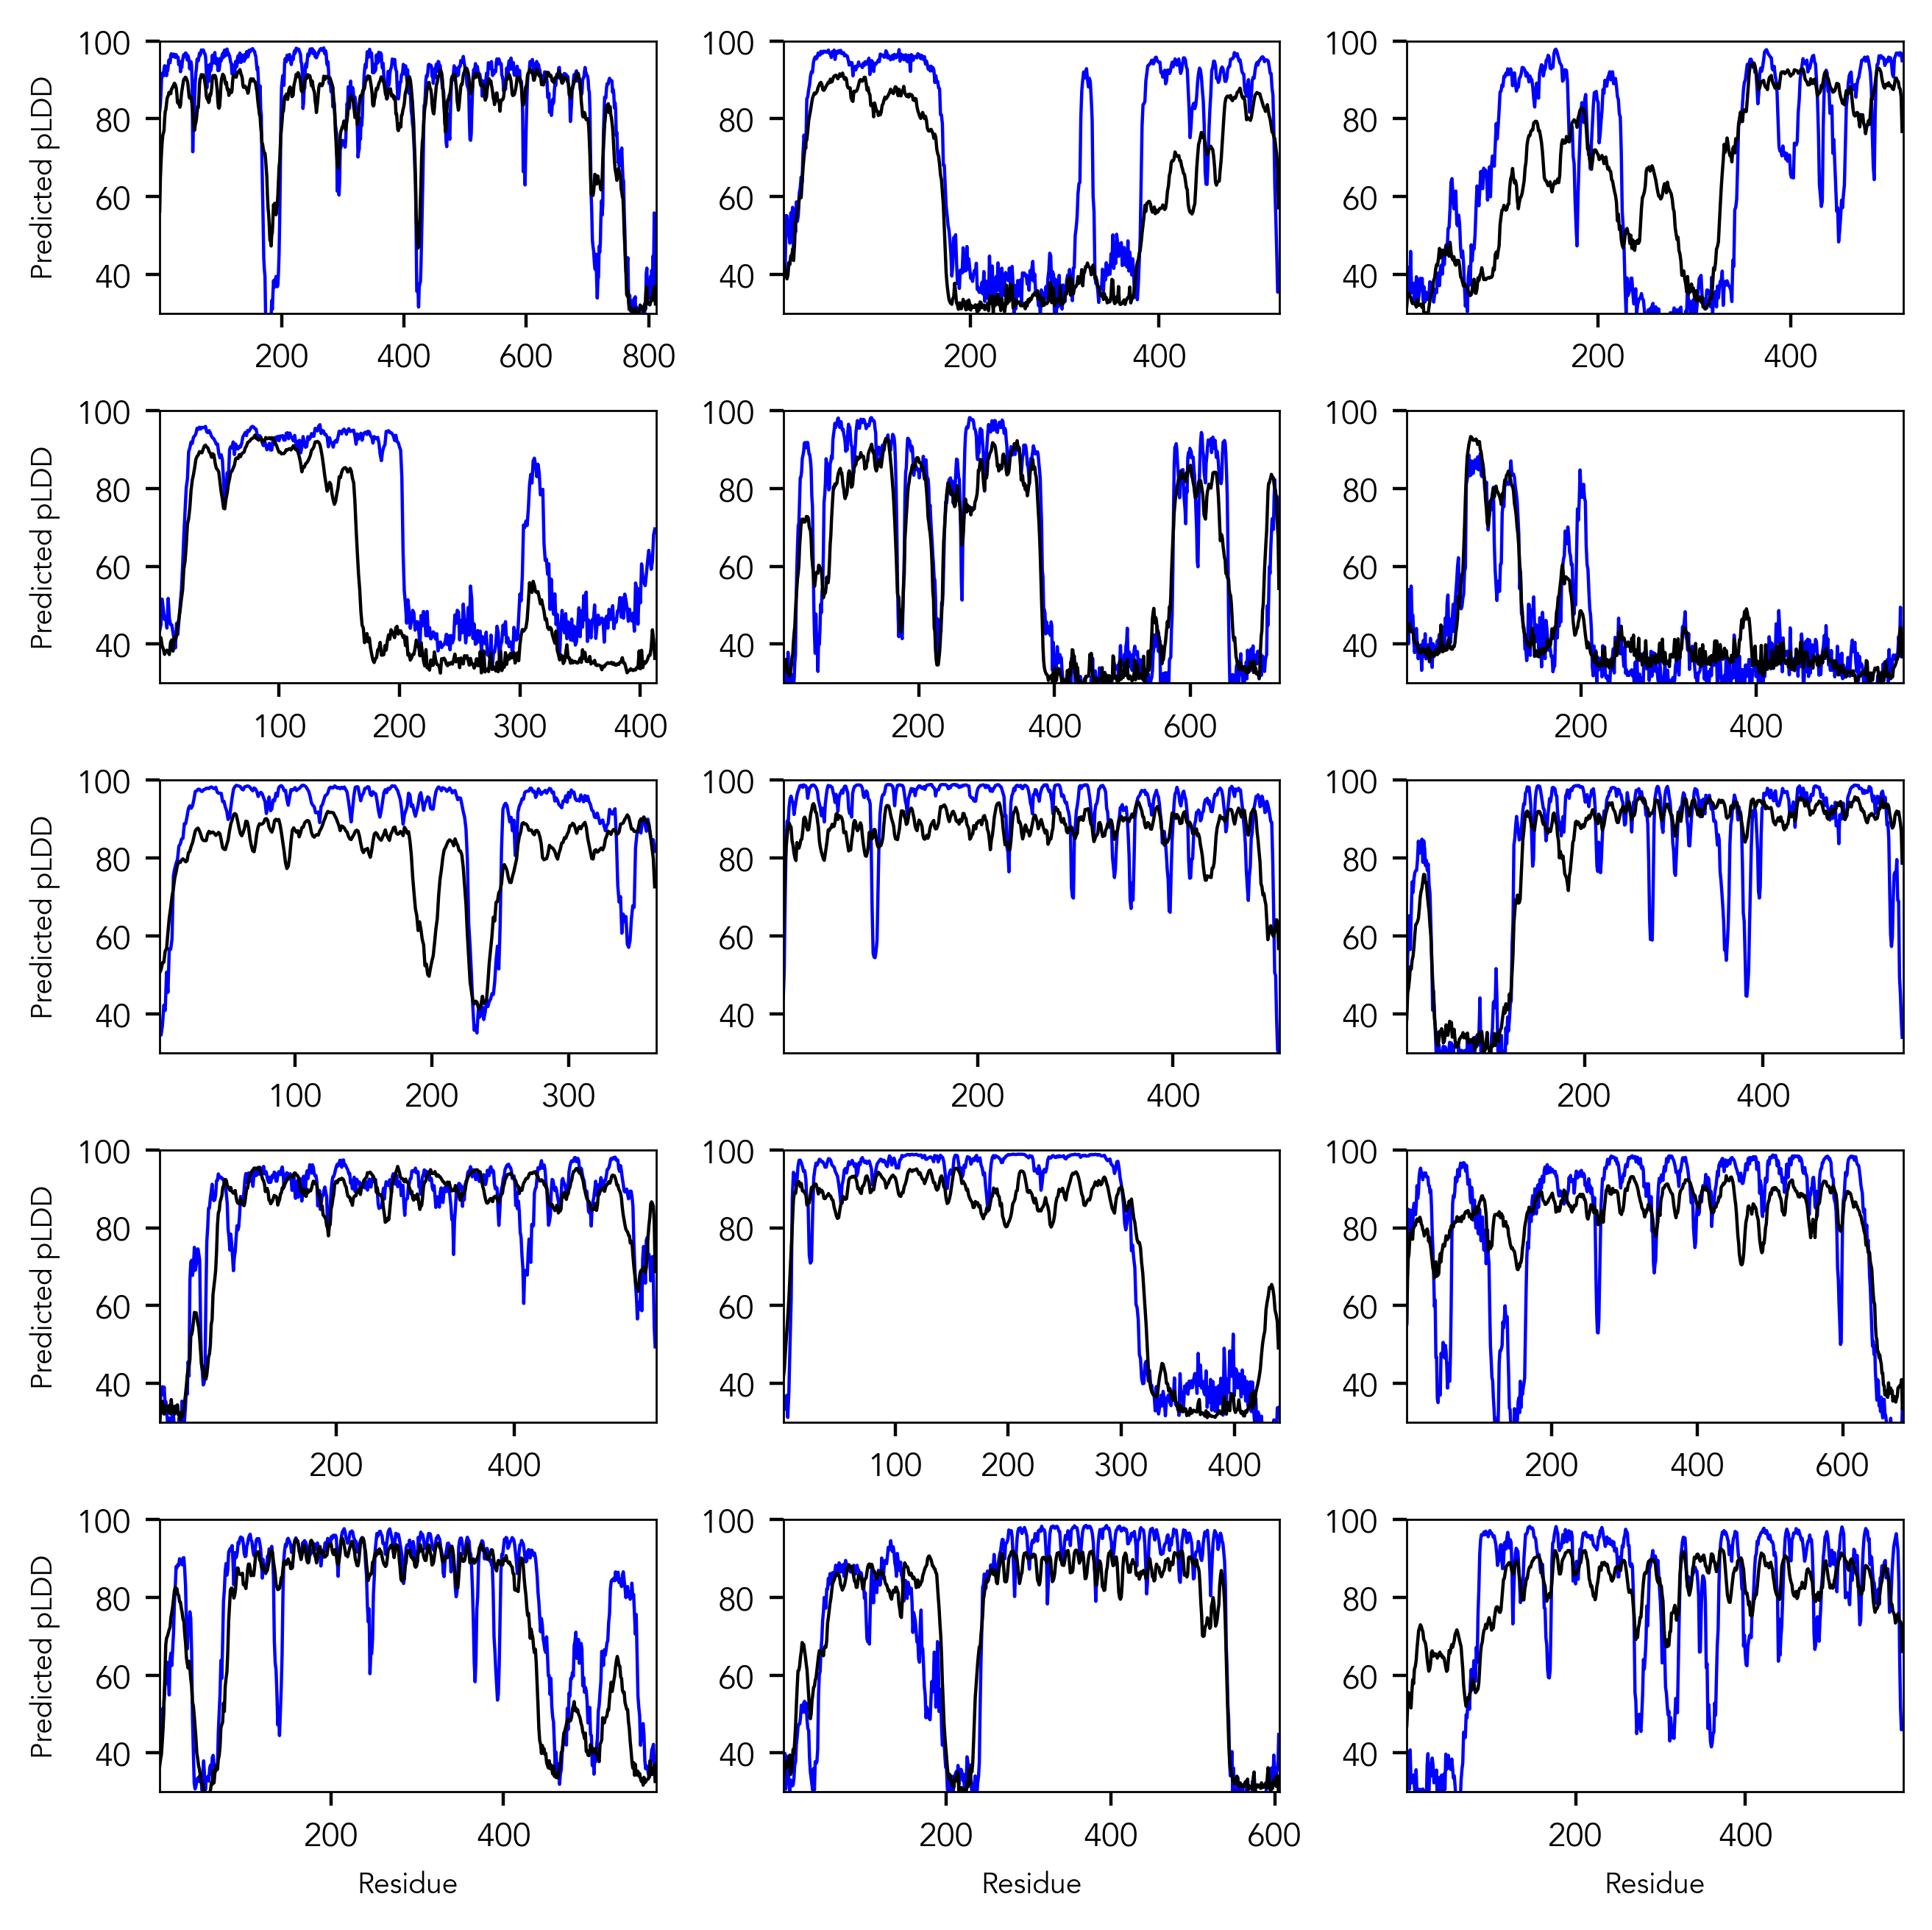

In [95]:
tmp = list(data.keys())
random.shuffle(tmp)

fig, axs = plt.subplots(5, 3, figsize=(6.5,6.5), dpi=200)

axs_list = []

idx = -1
for i in range(0,5):
    for j in range(0,3):
        ax = axs[i][j]
        
        idx = idx + 1
        while len(data[tmp[idx]][0]) > 950 or len(data[tmp[idx]][0]) < 350:
            idx = idx + 1
            
        seq = data[tmp[idx]][0]
        scores = data[tmp[idx]][1]
        ppLDDT = meta.predict_pLDDT(seq)
        
        residues = np.arange(1,len(seq)+1)
    
        ax.plot(residues, scores, '-b', linewidth=0.8, label='real')
        ax.plot(residues, ppLDDT, '-k', linewidth=0.8, label='metapredict')
        
    
        ax.set_ylim([30,100])
        ax.set_xlim([1,len(seq)+1])
        ax.tick_params(axis="x", labelsize=8)
        ax.tick_params(axis="y", labelsize=8)
        
        if i == 4:
            ax.set_xlabel('Residue', fontsize=7)
        if j == 0:
            ax.set_ylabel('Predicted pLDD', fontsize=7)

fig.tight_layout(pad=0.5)
plt.savefig('figures/example_pred_pLDDT.pdf')
        
        


In [44]:
binsize=0.01
OUT= np.histogram(R2,bins=np.arange(-1,1+binsize,binsize))
b = OUT[0]
v = OUT[1][0:-1]

np.mean(R2)


0.7041297188089646

ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

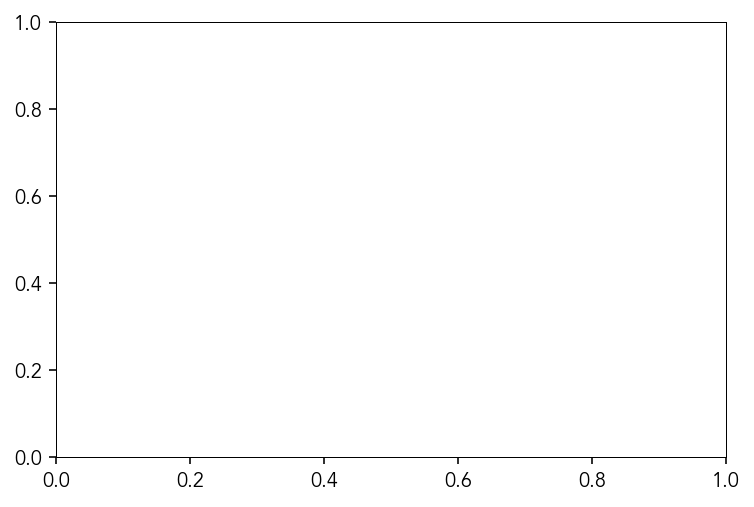

In [42]:
plt.plot(np.histogram(R2)[1],np.histogram(R2)[0])

6T4B
4BS2
4BS2


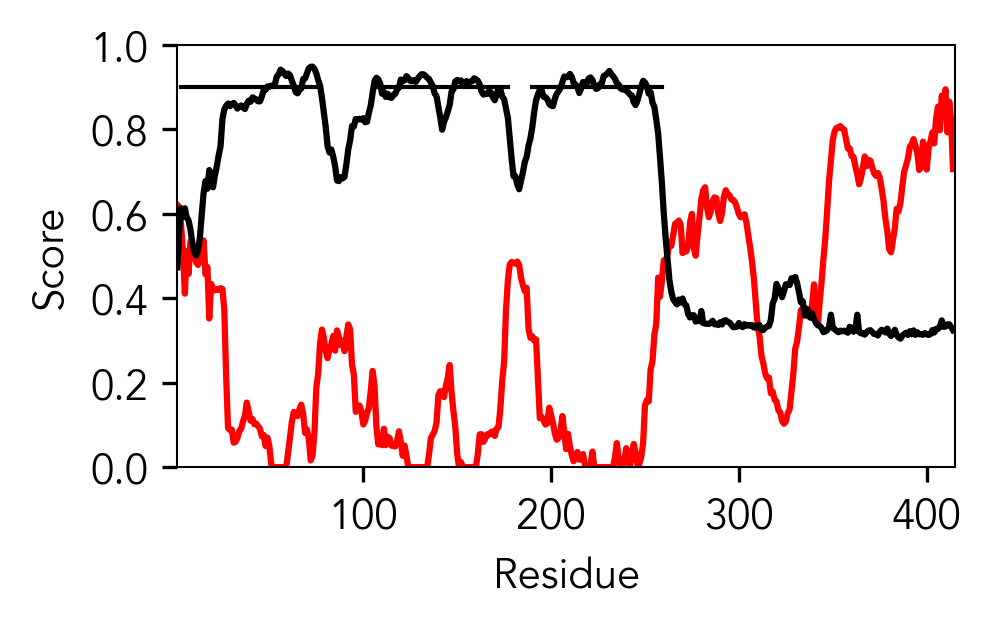

In [56]:
figure(num=None, figsize=(3.4, 2.2), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()

idx = np.arange(1,len(tdp43)+1)

plt.plot(idx, meta.predict_disorder(tdp43),'r')
plt.plot(idx, np.array(meta.predict_pLDDT(tdp43))/100,'k')

plt.plot([3,77],[0.9,0.9],'-k', linewidth=1, alpha=1)
plt.plot([105,177],[0.9,0.9],'-k', linewidth=1, alpha=1)
plt.plot([190,259],[0.9,0.9],'-k', linewidth=1, alpha=1)


plt.xlabel('Residue')
plt.ylabel('Score')
plt.ylim([0,1])
plt.xlim([1,len(tdp43)+1])
plt.tight_layout()
#
print('6T4B')
print('4BS2')
print('4BS2')
plt.savefig('figures/tdp43_example.pdf')

In [24]:
with open('data/sup35_pombe.txt','r') as fh:
    content = fh.readlines()

In [35]:
sup35_sp_seq = content[0].split()[1]
sup35_sp_scores = [float(i) for i in content[0].split()[2:]]


[[1.         0.96544034]
 [0.96544034 1.        ]]


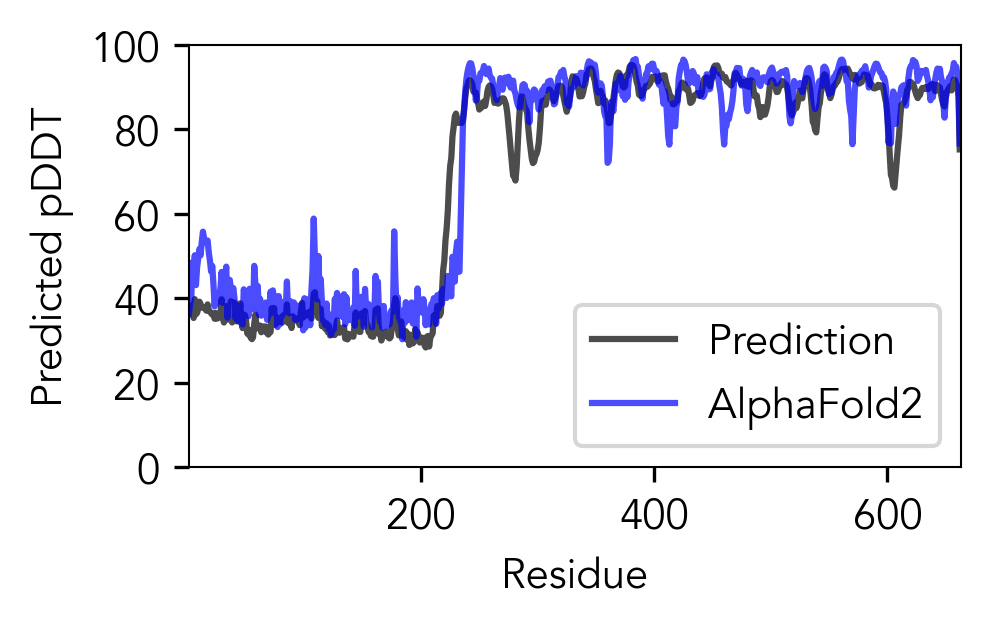

In [57]:
figure(num=None, figsize=(3.4, 2.2), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()

idx = np.arange(1,len(sup35_sp_seq)+1)

plt.plot(idx, meta.predict_pLDDT(sup35_sp_seq),'k-', alpha=0.7, label='Prediction')
plt.plot(idx, sup35_sp_scores, 'b-', alpha=0.7,label='AlphaFold2')
print(np.corrcoef(meta.predict_pLDDT(sup35_sp_seq), sup35_sp_scores))

plt.xlabel('Residue')
plt.ylabel('Predicted pDDT')
plt.ylim([0,100])
plt.xlim([1,len(sup35_sp_seq)+1])
plt.legend()
plt.tight_layout()

plt.savefig('figures/spb_example.pdf')